
<div dir=rtl >
<h1>قوانین انجمنی</h1>

قوانین انجمنی روابط و وابستگی‌های متقابل بین مجموعه بزرگی از اقلام داده‌ای را نشان می‌دهند. 

مثال متداول در رابطه با کشف قوانین انجمنی "تحلیل سبد خرید" است.  در این فرایند با توجه به اقلام مختلفی که مشتریان در سبد خریدشان قرار می‌دهند، عادات و رفتار خرید مشتریان مورد تحلیل قرار می‌گیرد و می‌توان با شناسایی ارتباط بین محصولات، الگوهای تکرار شونده در حین خرید را بدست آورد.

سه پارامتر مهم:
- Support  میزان محبوبیت یک مجموعه آیتم را با توجه به دفعات حضور در تراکنش‌ها نشان می‌دهد.
- Confidence  احتمال خرید آیتم y در صورت خرید آیتم x را نشان می‌دهد. x -> y
- Lift   ترکیب دو پارامتر بالا می‌باشد.

برای پیاده سازی قوانین انجمنی در این تمرین، از الگوریتم Apriori که یکی از محبوب‌ترین و کارآمدترین الگوریتم‌های این حوزه است استفاده می‌کنیم.


<font color='Green'> پرسش:  تاثیر مقادیر مختلف پارامتر Lift را در احتمال وقوع نتیجه بررسی کنید.  </font>

این مقدار از طریق فرمول زیر به دست می آید
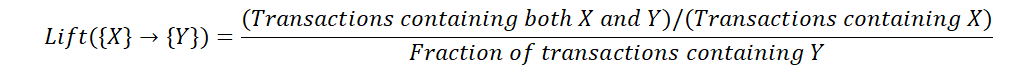

در این فرمول، تاثیری که وجود 
x
بر روی وجود
y
می گذارد را بررسی میکنیم.
اگر خروجی این فرمول عددی بیشتر از یک باشد نشان دهنده این است که وجود
x
احتمال وجود 
y
را افزایش می دهد. در غیر این صورت اگر کمتر از یک باشد به این معنی است که اگر برای مثال 
x
در سبد کالای مشتری بود احتمال این که 
y 
را نیز پس از آن انتخاب کند کم است.
</div>





<div dir=rtl >
<h1>الگوریتم Apriori</h1>

روش کار الگوریتم به این صورت است که یک  حداقل مقدار پشتیبانی در نظر گرفته    می‌شود و تکرارها با مجموعه آیتم‌های مکرر اتفاق می‌افتند. در صورتیکه  مجموعه‌ها و زیرمجموعه‌ها مقدار پشتیبانی کمتر از حد آستانه داشته باشند حذف می‌شوند. این روند تا زمانیکه امکان حذف وجود نداشته باشد ادامه می‌یابد. 

در این بخش از تمرین می‌خواهیم الگوریتم apriori را بر روی مجموعه داده Hypermarket_dataset که شامل سفارشات خرید افراد از فروشگاه های مواد غذایی است اعمال کنیم.


</div>





<div dir=rtl >
<h1>آماده‌سازی داده</h1>

<font color='Green'>پرسش: برای شروع کار باید داده‌های دیتاست را در قالب ماتریس پراکنده که محصولات  خریداری شده در ستون‌ و شماره سفارشات خرید به عنوان شاخص (index) هستند آماده کنید. 


برای راحتی کار محصولات خریداری شده در هر سفارش را با اعداد 0,1 کدگذاری کنید.

 نمونه ماتریس خروجی شما:

<img src="https://drive.google.com/uc?id=1eD0jan1ZbeYqSklgK--ks7oeY-MyTA3p"></img>

</div>




In [ ]:
import numpy as np
import pandas as pd
from scipy import sparse

import matplotlib.pyplot as plt
 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df = pd.read_csv('Hypermarket_dataset.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
df = df.drop("Date" , 1)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Member_number,itemDescription
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk
...,...,...
38760,4471,sliced cheese
38761,2022,candy
38762,1097,cake bar
38763,1510,fruit/vegetable juice


In [ ]:
df.sort_values(by=['Member_number'], inplace=True)

In [ ]:
pf = pd.DataFrame(data = 0 ,columns = set(df.itemDescription) , index=sorted(list(set(df.Member_number))))
pf

,white bread,cookware,semi-finished bread,cake bar,canned fish,pickled vegetables,flour,herbs,berries,canned beer,...,chocolate marshmallow,other vegetables,bathroom cleaner,whipped/sour cream,pip fruit,pasta,rolls/buns,turkey,sweet spreads,frankfurter
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in pf.index:
  pf.loc[ i , set(df[df.Member_number == i].itemDescription)] = 1

In [ ]:
pf

,white bread,cookware,semi-finished bread,cake bar,canned fish,pickled vegetables,flour,herbs,berries,canned beer,...,chocolate marshmallow,other vegetables,bathroom cleaner,whipped/sour cream,pip fruit,pasta,rolls/buns,turkey,sweet spreads,frankfurter
1000,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1002,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1004,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4997,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4999,0,0,1,0,0,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0



<div dir=rtl >
<h1>شناسایی الگوهای پر تکرار</h1>

<font color='Green'> پرسش:  با اعمال الگوریتم apriori و به ازای مقدار min_support = 0.07 تمامی الگوهای پر تکرار را تولید نمایید. 

</div>




In [ ]:
apriori(pf, min_support=0.07 ,use_colnames=True).sort_values(by = 'support')

,support,itemsets
72,0.070292,"(domestic eggs, whole milk)"
78,0.071575,"(other vegetables, pastry)"
45,0.071575,"(yogurt, root vegetables)"
43,0.071832,"(citrus fruit, rolls/buns)"
81,0.071832,"(yogurt, other vegetables, whole milk)"
...,...,...
16,0.282966,(yogurt)
21,0.313494,(soda)
36,0.349666,(rolls/buns)
33,0.376603,(other vegetables)



<div dir=rtl >
<h1>استخراج قوانین انجمنی</h1>


<font color='Green'> پرسش: تابعی بنویسید که با گرفتن دو ورودی confidence و lift قوانین انجمنی حاصل را در خروجی نشان دهد. </br>
برای دو حالت خروجی خود را در گزارش ثبت کنید.


</div>




In [ ]:

def get_rules(fi , metric , min_threshold):
  rules = association_rules(fi, 
                            metric=metric, 
                            min_threshold=min_threshold)
  return rules

In [ ]:
fi = apriori(pf, min_support=0.07 , use_colnames=True)

In [ ]:
get_rules(fi , 'lift' , 1.2).sort_values(by = ['lift'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(rolls/buns, whole milk)",(other vegetables),0.178553,0.376603,0.082093,0.459770,1.220834,0.014850,1.153947
12,(other vegetables),"(rolls/buns, whole milk)",0.376603,0.178553,0.082093,0.217984,1.220834,0.014850,1.050422
11,(whole milk),"(other vegetables, rolls/buns)",0.458184,0.146742,0.082093,0.179171,1.220996,0.014859,1.039508
10,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,0.014859,1.229837
8,"(other vegetables, whole milk)",(rolls/buns),0.191380,0.349666,0.082093,0.428954,1.226753,0.015174,1.138847
13,(rolls/buns),"(other vegetables, whole milk)",0.349666,0.191380,0.082093,0.234776,1.226753,0.015174,1.056710
3,"(yogurt, whole milk)",(other vegetables),0.150590,0.376603,0.071832,0.477002,1.266589,0.015119,1.191967
6,(other vegetables),"(yogurt, whole milk)",0.376603,0.150590,0.071832,0.190736,1.266589,0.015119,1.049608
1,(yogurt),(sausage),0.282966,0.206003,0.075423,0.266546,1.293892,0.017132,1.082545
0,(sausage),(yogurt),0.206003,0.282966,0.075423,0.366127,1.293892,0.017132,1.131196


In [ ]:
get_rules(fi , 'confidence',0.5).sort_values(by = ['confidence'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
11,(pip fruit),(whole milk),0.170600,0.458184,0.086968,0.509774,1.112598,0.008801,1.105239
12,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
8,(pastry),(whole milk),0.177527,0.458184,0.091072,0.513006,1.119651,0.009732,1.112572
10,(whipped/sour cream),(whole milk),0.154695,0.458184,0.079785,0.515755,1.125650,0.008906,1.118888
2,(newspapers),(whole milk),0.139815,0.458184,0.072345,0.517431,1.129310,0.008284,1.122775
4,(sausage),(whole milk),0.206003,0.458184,0.106978,0.519303,1.133394,0.012591,1.127146
6,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,0.014452,1.142615
7,(domestic eggs),(whole milk),0.133145,0.458184,0.070292,0.527938,1.152242,0.009287,1.147766
0,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,0.011526,1.147795
